Clayton Cohn<br>
May 6, 2020<br>
DSC 478<br>
Prof. Mobasher

# Assignment 3

In [1]:
import pandas as pd

DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/communities/communities.csv"

__1. Linear Regression [Dataset: communities.zip] For this problem you will experiment with multiple linear regression models to make predictions with numerical data.__

You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). 

The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. 

Please read the full description of the data, including the description and statistics on different variables. 

__The target attribute for regression purposes is "ViolentCrimesPerPop".__ 

__The two identifier attributes "state" and "community name" should be excluded for the regression task.__

Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn.

    The provided data is already normalized (see description), so there is no need for additional normalization. 
        
    Separate the target attribute for regression. 

In [2]:
import numpy as np

df = pd.read_csv(DATA_PATH, header=0)
df = df.drop(columns=['state', 'communityname'])

df = df.replace({'?': np.nan})
df = df.dropna()
df = df.astype(np.float)

df.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [3]:
X = df.drop(columns=["ViolentCrimesPerPop"])

X.head(30)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.00,0.00,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.00,0.00,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.00,0.00,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.01,0.00,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.00,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11


In [4]:
y = df["ViolentCrimesPerPop"]
y.head(10)

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
5    0.14
6    0.03
7    0.55
8    0.53
9    0.15
Name: ViolentCrimesPerPop, dtype: float64

Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. 

In [5]:
X.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,...,0.029453,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741
std,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,...,0.102630,0.100424,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.010000,0.000000,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [6]:
from sklearn.model_selection import train_test_split

SEED = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1595,0.14,0.56,0.85,0.29,0.09,0.03,0.76,0.83,0.77,0.37,...,0.12,0.09,0.09,0.62,0.33,0.36,0.36,0.34,0.07,0.27
319,0.01,0.40,0.02,0.82,0.11,0.22,0.39,0.42,0.25,0.48,...,0.06,0.01,0.19,0.66,0.30,0.57,0.78,0.01,0.26,0.02
993,0.00,0.33,0.00,0.99,0.01,0.01,0.36,0.40,0.24,0.58,...,0.01,0.00,0.03,0.67,0.76,0.77,0.71,0.02,0.15,0.02
466,0.01,0.71,0.36,0.65,0.21,0.06,0.77,0.65,0.66,0.41,...,0.00,0.00,0.35,0.48,0.66,0.53,0.57,0.01,0.48,0.82
1462,0.01,0.65,0.08,0.89,0.20,0.04,0.48,0.36,0.20,0.18,...,0.00,0.00,0.13,0.22,0.20,0.00,0.00,0.07,0.07,0.01
252,0.02,0.51,0.01,0.96,0.14,0.01,0.41,0.37,0.22,0.24,...,0.00,0.00,0.10,0.48,0.34,0.23,0.34,0.03,0.17,0.02
1794,0.07,0.69,0.02,0.79,0.62,0.17,0.44,0.42,0.26,0.13,...,0.00,0.00,0.36,0.51,0.36,0.63,0.73,0.05,0.25,0.02
1111,0.05,0.50,0.03,0.95,0.12,0.02,0.41,0.36,0.22,0.35,...,0.00,0.00,0.11,0.70,0.52,0.73,0.65,0.08,0.12,0.07
191,0.04,0.42,0.04,0.93,0.12,0.08,0.30,0.55,0.32,0.33,...,0.04,0.00,0.26,0.70,0.59,0.69,0.64,0.06,0.13,0.04
1831,0.01,0.34,0.43,0.64,0.02,0.07,0.53,0.52,0.46,0.80,...,0.01,0.00,0.12,0.31,0.35,0.48,0.51,0.03,0.14,0.02


b. Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). 

In [7]:
# Code taken from the notebook provided by Prof. Mobasher: Regression-scikit-learn.ipynb
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [8]:
w = standRegres(X_train,y_train)
w

matrix([[-7.29951554e-02],
        [-7.53030517e-02],
        [ 2.66247071e-01],
        [ 5.22394235e-02],
        [ 1.99935027e-02],
        [ 1.01527076e-01],
        [ 2.33361309e-01],
        [-5.46039929e-02],
        [-2.97121760e-01],
        [ 8.37162786e-02],
        [-1.50162587e-02],
        [ 4.14432868e-02],
        [-2.99475546e-01],
        [-1.18768348e-01],
        [ 5.58235091e-02],
        [-1.64843859e-01],
        [ 1.52174344e-01],
        [ 2.36833651e-02],
        [-6.97037993e-02],
        [ 2.08719191e-01],
        [ 4.48986953e-02],
        [-1.51891147e-01],
        [-8.07996019e-03],
        [-3.02927673e-02],
        [ 7.59215758e-03],
        [ 3.24313423e-02],
        [ 5.38076844e-02],
        [ 1.31517908e-02],
        [-1.40754558e-01],
        [-1.02607794e-01],
        [ 1.04330685e-01],
        [ 1.45368382e-01],
        [ 3.42360968e-02],
        [ 2.23622210e-01],
        [-4.65727657e-02],
        [-2.37705369e-02],
        [ 6.27397561e-01],
 

Compute the RMSE value on the full training data (the 80% partition). 

In [9]:
# Now that we have the regression coefficients, we can compute the predictions:
xMat=np.mat(X_train)
yMat=np.mat(y_train)
yHat = xMat*w

# You can "ravel" the 2d matrix above to get a 1d Numpy array more suitable for using in earlier functions.
yHat = yHat.A.ravel()
yHat[:10]

array([0.62793195, 0.3290257 , 0.03911177, 0.0665327 , 0.04747281,
       0.03596758, 0.0642721 , 0.11410864, 0.16304219, 0.42198928])

In [10]:
# Now we can constuct an array of errors
err = abs(yHat - y_train)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

In [11]:
# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.12694382992342523


Also, plot the correlation between the predicted and actual values of the target attribute. 

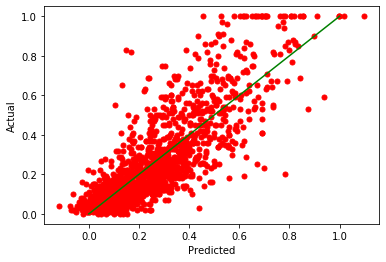

In [12]:
# Plot predicted against actual (in the training data)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(yHat, y_train,'ro', markersize=5)
plt.plot([0,1],[0,1], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Display the obtained regression coefficients (weights) and plot them using matplotlib.

In [13]:
for i in range(len(X_train.columns)):
    print("%7s   %2.2f" % (X_train.columns[i], w[i]))

population   -0.07
householdsize   -0.08
racepctblack   0.27
racePctWhite   0.05
racePctAsian   0.02
racePctHisp   0.10
agePct12t21   0.23
agePct12t29   -0.05
agePct16t24   -0.30
agePct65up   0.08
numbUrban   -0.02
pctUrban   0.04
medIncome   -0.30
pctWWage   -0.12
pctWFarmSelf   0.06
pctWInvInc   -0.16
pctWSocSec   0.15
pctWPubAsst   0.02
pctWRetire   -0.07
medFamInc   0.21
perCapInc   0.04
whitePerCap   -0.15
blackPerCap   -0.01
indianPerCap   -0.03
AsianPerCap   0.01
OtherPerCap   0.03
HispPerCap   0.05
NumUnderPov   0.01
PctPopUnderPov   -0.14
PctLess9thGrade   -0.10
PctNotHSGrad   0.10
PctBSorMore   0.15
PctUnemployed   0.03
PctEmploy   0.22
PctEmplManu   -0.05
PctEmplProfServ   -0.02
MalePctDivorce   0.63
MalePctNevMarr   0.21
FemalePctDiv   0.28
TotalPctDiv   -0.76
PersPerFam   -0.10
PctFam2Par   0.03
PctKids2Par   -0.20
PctYoungKids2Par   -0.02
PctTeen2Par   0.00
PctWorkMomYoungKids   0.07
PctWorkMom   -0.19
NumIlleg   -0.12
PctIlleg   0.19
NumImmig   -0.10
PctImmigRecent   0.0

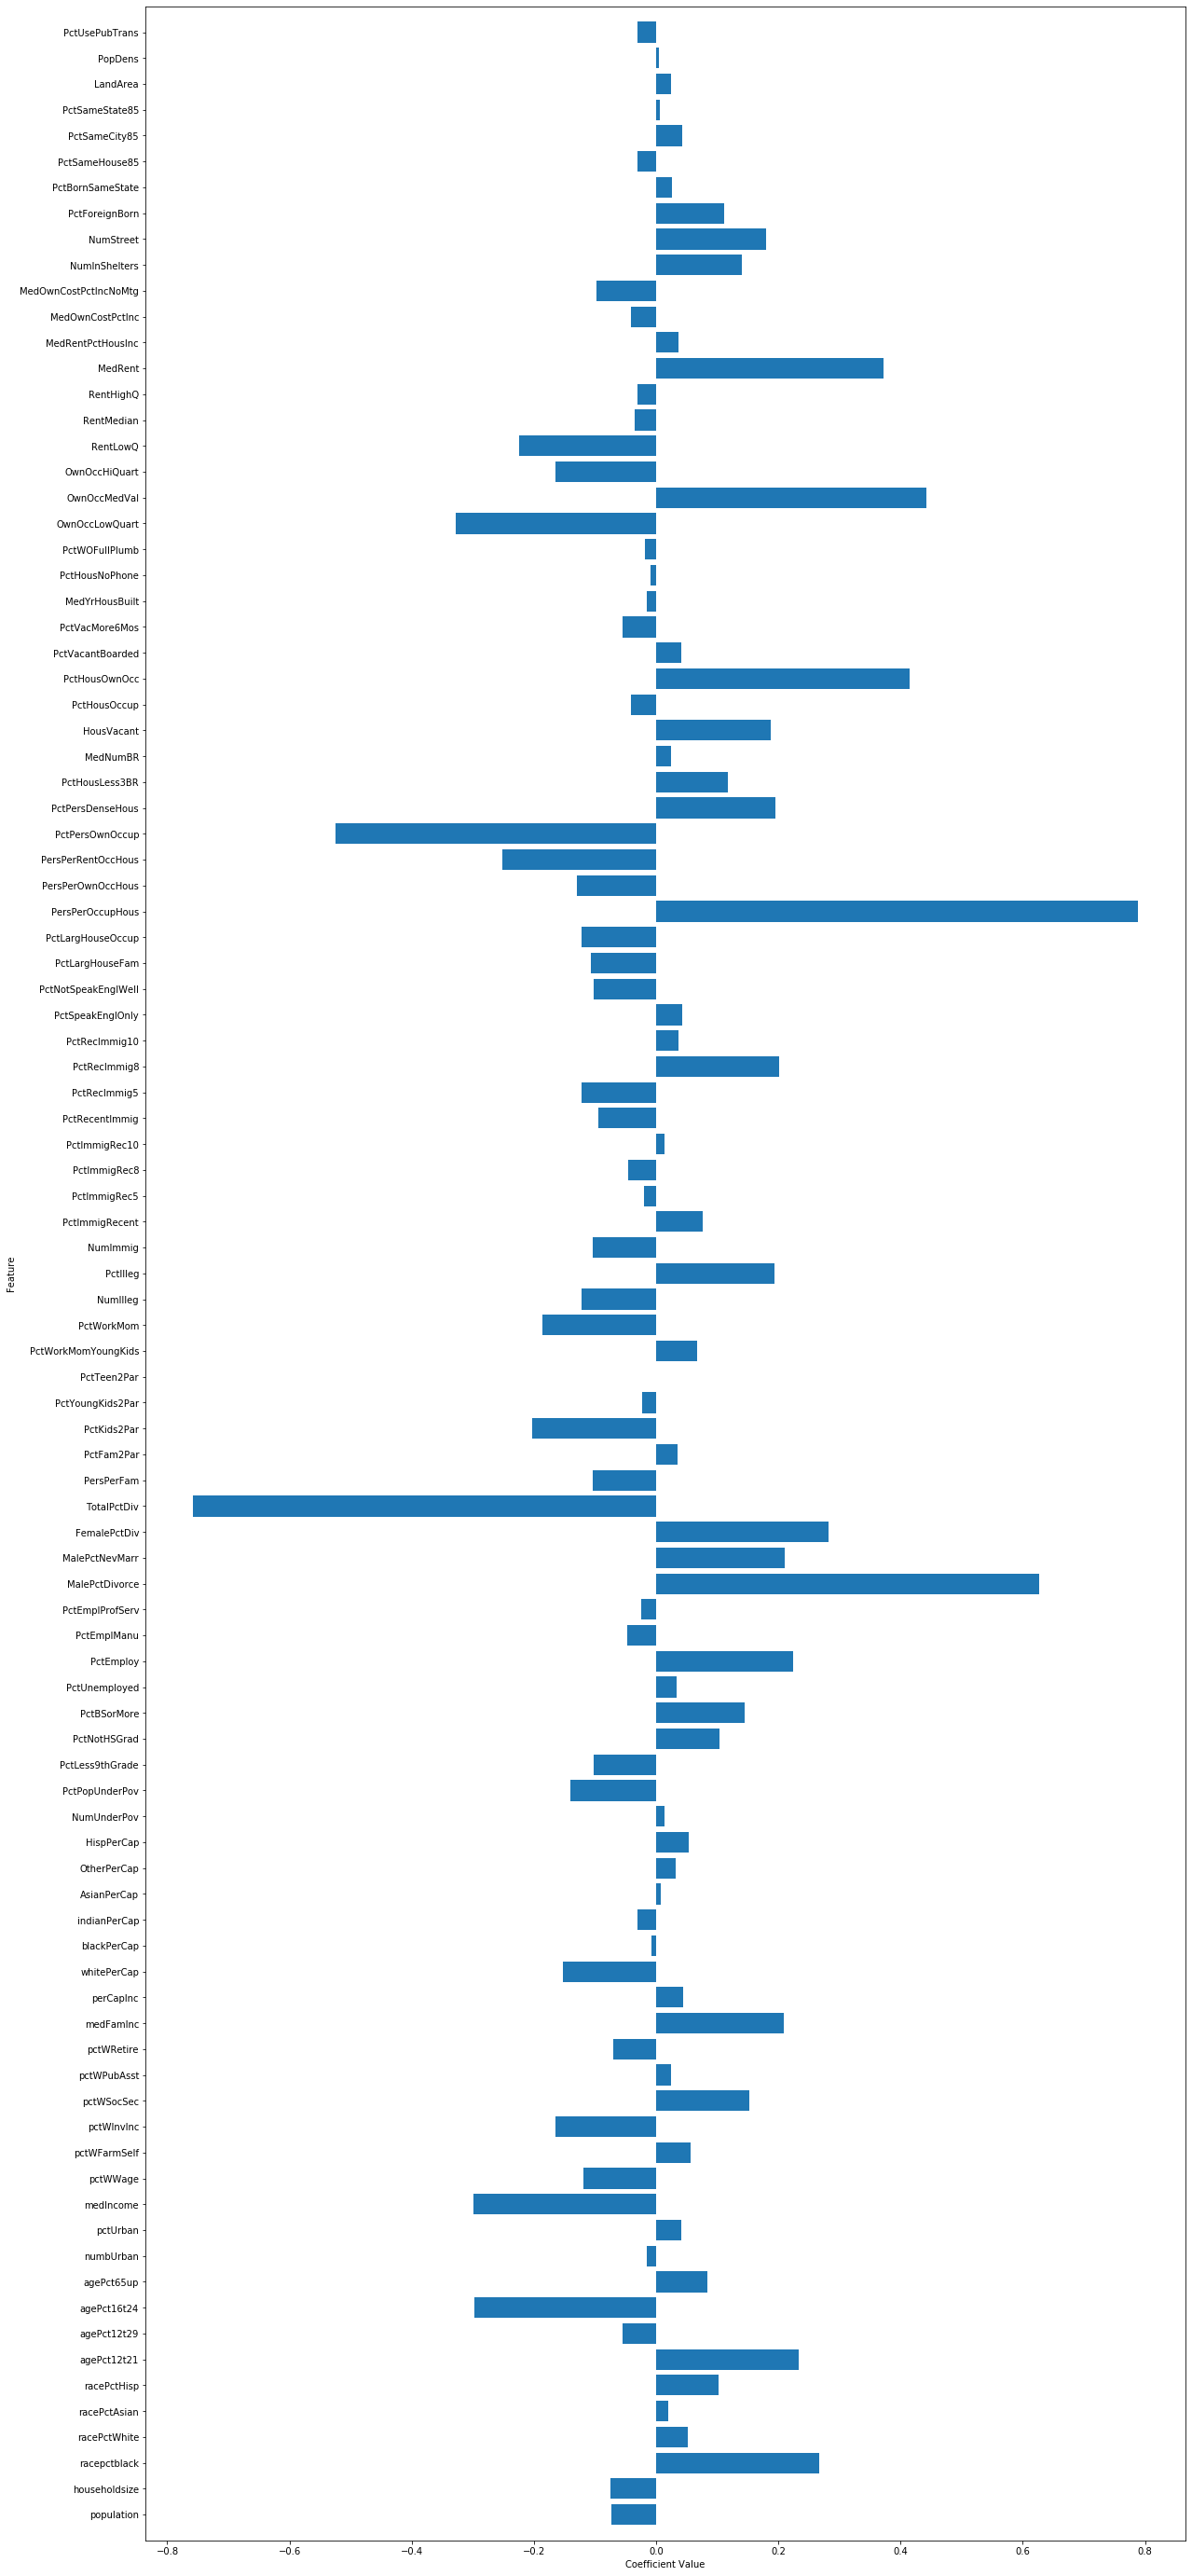

In [14]:
w_flat = w.A.ravel()

def plot_coefficients(weights, n_features, feature_names):
    plt.rcParams["figure.figsize"] = (20,50)
    plt.barh(range(n_features), weights, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()
    
plot_coefficients(w_flat, len(X_train.columns), X_train.columns)

Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [15]:
from sklearn.model_selection import KFold

n = 10

kf = KFold(n_splits=n, random_state=22, shuffle=True)
xval_err = 0
f = 1
for train, test in kf.split(X_train):
    X_fold_train = X_train[X_train.index.isin(train)]
    y_fold_train= y_train[y_train.index.isin(train)]

    w = standRegres(X_fold_train,y_fold_train)

    xMat=np.mat(X_fold_train)
    yMat=np.mat(y_fold_train)
    yHat = xMat*w
    yHat = yHat.A.ravel()
    
    err = abs(yHat - y_fold_train)
    total_error = np.dot(err,err)
    
    rmse = np.sqrt(np.dot(err,err)/len(X_fold_train))
    print("Fold %2d RMSE: %.4f" % (f, rmse))
    xval_err += rmse
    f += 1
print("\nRMSE on Training Data w/ cross-validation:",xval_err/n)

Fold  1 RMSE: 0.1233
Fold  2 RMSE: 0.1225
Fold  3 RMSE: 0.1251
Fold  4 RMSE: 0.1243
Fold  5 RMSE: 0.1259
Fold  6 RMSE: 0.1228
Fold  7 RMSE: 0.1253
Fold  8 RMSE: 0.1228
Fold  9 RMSE: 0.1232
Fold 10 RMSE: 0.1243
RMSE on Training Data w/ cross-validation: 0.12394995919531052
